In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   --------------------------------------  358.4/359.5 kB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 34.0 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 34.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 21.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/104.8 kB ? eta -:--:--
   ---------------------------------------- 104.8/104.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.6 MB 38.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.6 MB 41.0 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/11.6 MB 31.8 MB/s eta 0:00:01
   -----------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
streamlit 1.31.1 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


In [388]:
df = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\Finall_data.xlsx')
dfprice = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\with_price.xlsx')

In [12]:
temp = pd.DataFrame()
temp['unique'] = df.nunique()
temp['null_value'] = df.isna().sum()
# temp['type'] = df.astype()
# temp['relation'] = df['review'].corr()
temp

,unique,null_value
Job_role,32,0
Company,5101,0
job_pay,278,0
location,1049,0
review,41,0
Job post length,66,0
min_year,3,0
max_year,18,0
more_branch,13,0
+3_branches,2,0


In [568]:
# Update skill_1 with skill_8 where skill_1 is NaN
# df.loc[df["skill_2"].isna(), "skill_2"] = df["skill_8"]

# # Set skill_8 to NaN for these rows
# df.loc[df["skill_8"] == df["skill_2"], "skill_8"] = np.nan

df = df[~((df["skill_8"].isna()) & (df["job_pay"] == "Not disclosed"))] 


In [391]:
df.columns

Index(['Job_role', 'Company', 'job_pay', 'location', 'review',
       'Job post length', 'min_year', 'max_year', 'more_branch', '+3_branches',
       'days', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5',
       'skill_6', 'skill_7', 'skill_8', 'is_remote', 'norm_review',
       'norm_branches', 'norm_max_year', 'composite_score', 'Company Size',
       'Job Category', 'Primary Skill Category'],
      dtype='object')

###                   EDA PROCESS


##### We have 28 column WE WILL DO EDA ONE BY ONE TO EACH OF THEM 

# First column JOB_ROLE 

- *Conclusion*
    - Data is scapped from a website so its Very messy 
    - So in job role columns there are jobs which are like writeen diffrently but is same so we have to clean them 
    - 6200 diff... type of Job roles So we have to make them up to 100 or 500 atleast to do some thing with data 

In [392]:
df.describe()

,review,Job post length,min_year,max_year,more_branch,+3_branches,days,is_remote,norm_review,norm_branches,norm_max_year,composite_score
count,10163.000000,10163.000000,10163.000000,10163.000000,10163.000000,10163.000000,10163.00000,10163.000000,10163.000000,10163.000000,10163.000000,10163.000000
mean,3.813283,25.475450,1.304241,4.422119,1.798878,0.157139,16.57975,0.027157,0.703321,0.157139,0.147404,1.007863
std,0.764804,12.757841,0.746921,1.691264,1.757177,0.363949,12.29277,0.162550,0.191201,0.363949,0.056375,0.420268
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.066667
25%,3.500000,16.000000,1.000000,3.000000,1.000000,0.000000,4.00000,0.000000,0.625000,0.000000,0.100000,0.783333
50%,4.000000,22.000000,1.000000,4.000000,1.000000,0.000000,14.00000,0.000000,0.750000,0.000000,0.133333,0.916667
75%,4.300000,31.000000,2.000000,5.000000,2.000000,0.000000,30.00000,0.000000,0.825000,0.000000,0.166667,1.066667
max,5.000000,70.000000,2.000000,30.000000,14.000000,1.000000,30.00000,1.000000,1.000000,1.000000,1.000000,2.275000


In [393]:
df['Job_role'].value_counts().head(20)

Software Developer                1128
Data Analyst                       774
Software Engineer                  728
Web Developer                      658
Data Scientist                     498
Web Designer                       484
Sr. Data Analyst                   336
Content Writer                     302
Digital Marketing Executive        300
Business Development Executive     288
Business Analyst                   285
Data Engineer                      265
Chat Support Executive             162
Other Data Role                    147
Sr. Software Developer             126
Application Engineer               121
Sr. Software Engineer              104
Consultant                         101
Jr. Software Developer              85
Jr. Data Analyst                    61
Name: Job_role, dtype: int64

<Axes: >

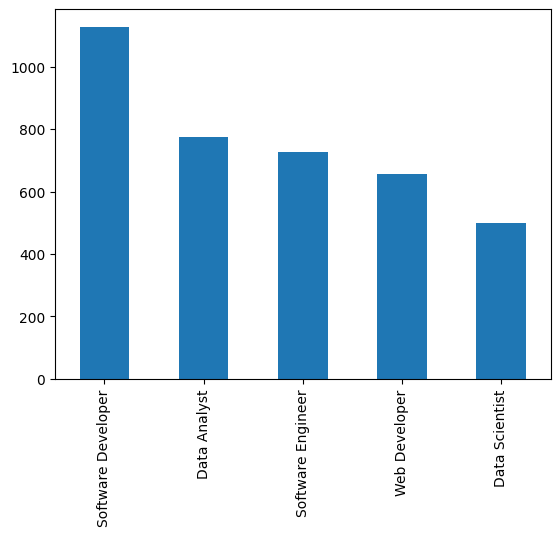

In [394]:
df['Job_role'].value_counts().head().plot(kind='bar')


<Axes: >

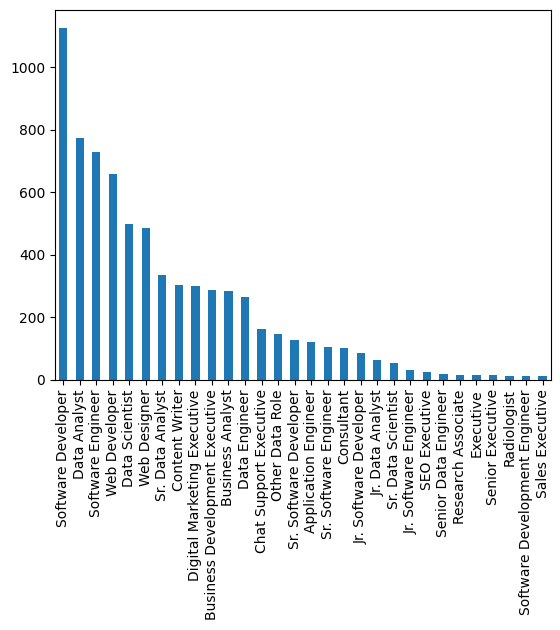

In [ ]:
df['Job_role'].value_counts().head(30).plot(kind='bar')

In [396]:
# To clean Data Analyist Role
### post to replace with 
# Senior
# Junior
# Sr.
# Jr.
# Sr
# Jr

# # # Junior
# ASSISTANT  
# Associate  
# Intern  
# Fresher  

# # # senior
# Trainer  
# Executive  
# Advanced  
# Master  
def clean_job_roles(column):
    senior_terms = ['Senior','senior', 'sr.',' sr. ', 'sr', 'trainer', 'executive', 'advanced', 'master']
    junior_terms = ['jr.', 'junior', 'jr', 'assistant', 'associate', 'intern', 'fresher']
    cleaned_roles = []
    
    for role in column:
        role_lower = role.strip().lower()
        if 'data analyst' in role_lower:
            if any(term in role_lower for term in senior_terms):
                cleaned_roles.append('Sr. Data Analyst')
            elif any(term in role_lower for term in junior_terms):
                cleaned_roles.append('Jr. Data Analyst')
            elif role_lower == 'data analyst':
                cleaned_roles.append('Data Analyst')
            elif role_lower != 'data analyst':
                cleaned_roles.append('Data Analyst')
            else:
                 cleaned_roles.append(role)
        else:
             cleaned_roles.append(role)
    
    return cleaned_roles
df['Job_role'] = clean_job_roles(df['Job_role'])


In [397]:
# Manually Data Analyics clean up
df['Job_role'] = df['Job_role'].str.replace('SEO Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Sr. Data Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Senior Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Supply Chain Analytics - Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Research Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Tax Senior Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Research Analyst','Sr. Data Analyst',)
df['Job_role'] = df['Job_role'].str.replace('Quality Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Sr. Data Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Product Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Marketing Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Web Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Associate Business Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Content Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Fundamental Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Research Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Senior Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Business Intelligence Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Financial, Data Modeling & Research Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Technical Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Mis Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('MIS Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('MIS Executive and Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Reporting Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Operations Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('GIS Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Digital Marketing Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Financial Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Cost Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Finance Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Digital Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Project Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Ad Business Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('GN-Comms & Media- Non Networks - Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Associate Hospitality Revenue Optimization Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Healthcare Analytics - Analyst - Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('SAS Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Actuarial Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Integrity Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Analyst - Data Science','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('Analyst - S&C Global Network - AI - Resources - Data Science Analyst','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Resources - Data Science Analyst','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Healthcare Analytics - Analyst','Data Scienctist')


C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\39990325.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Market Sr. Data Analyst','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\39990325.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Data Sr. Data Analyst','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\39990325.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Business Analyst','Business Analyst')


In [398]:
# To clean Data Scientist Role
def clean_job_roles(columns):
    junior = ['associate','assistant','applied','junior']
    senior = ['senior','sr.','mL','machine Learning']
    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'data scientist' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Data Scientist')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Data Scientist')
            elif role_lower == 'data scientist':
                cleaned_column.append('Data Scientist')
            elif role_lower != 'data scientist':
                cleaned_column.append('Data Scientist')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
    
df['Job_role'] = clean_job_roles(df['Job_role'])

In [399]:
#Data Scientist clean up
df['Job_role'] = df['Job_role'].str.replace('Scientific Software Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Scientific Administrative Assistant','Jr. Data Scientist')
# df['Job_role'] = df['Job_role'].str.replace('Data Scienctist','Sr. Data Scientist')

def clean_job_roles(columns):
    junior = ['jr.','associate','assistant','applied','junior']
    senior = ['ai','senior','sr.','mL','machine Learning']

    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'scientist' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Data Scientist')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Data Scientist')
            elif role_lower != 'data scientist':
                cleaned_column.append('Data Scientist')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [400]:
# Software Engineer Clean Up Function

def clean_job_roles(columns):
    senior = ['senior','sr.','mL','machine Learning']
    junior = ['jr.','associate','assistant','applied','junior']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'software engineer' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Engineer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Engineer')
            elif role_lower != 'software engineer':
                cleaned_column.append('Software Engineer')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])


In [401]:
# manual cleaning Data Scientist
df['Job_role'] = df['Job_role'].str.replace('Machine Learning Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('AI / ML Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('ML Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Deep Learning Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Data Science Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('AI Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Mis Executive','MIS Executive')
df['Job_role'] = df['Job_role'].str.replace('Chatbot Developer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Associate Data Scientist','Data Scientist')

In [688]:
df[df["Job_role"].str.lower().str.contains("Engineer".lower())]["Job_role"].value_counts().head(30)

Software Engineer       934
Data Engineer           257
Engineer                188
Application Engineer    131
Name: Job_role, dtype: int64

In [952]:
df[df['Job_role'].str.lower().str.contains('Service'.lower())]['Job_role'].value_counts().head(50)


Client Service                                                       1
Job Opportunity -Internal Audit Role- MAS Financials Services Ltd    1
Process Excellence Champion - Financial Services                     1
Senior Officer - Financial Planning & Shared Services Center         1
Service Now                                                          1
Service Desk                                                         1
Name: Job_role, dtype: int64

In [914]:
df[df['Job_role'].str.contains('cyber')]['Job_role'].value_counts().head(50)


Series([], Name: Job_role, dtype: int64)

In [789]:
l = [1061,  798,  772,  750,  533,  464,  355,  324,  298,  284,  270,
        266,  257,  254,  225,  218,  166,  149,  133,  131,  118,  115,
        107,  101,   90,   78,   59,   29,   14,   12]

sum(l)

8431

In [962]:
filtered_df['Job_role'].value_counts().sum()

9149

In [853]:
df['Job_role'].value_counts().tail(50)

BA - Medical Domain Professional                                   1
Computer Sc.                                                       1
Accountant and Admin                                               1
Costing profile For Nigeria location                               1
Urgent requirement For Deputy Policy Manger.                       1
Market Place -PMO                                                  1
Pre-Doc in Development Economics                                   1
Configuration Specialist-1                                         1
Entrepreneur In Residence - IIM / IIT / NIT                        1
E. Com Operations                                                  1
Warehouse Incharge                                                 1
Visibility and Brand Promotion Specialist                          1
Computer Operator                                                  1
Ppc Specialist                                                     1
Founders Office Ninja             

In [404]:
# Software Engineer Clean Up Function
def clean_job_roles(columns):
    senior = ['senior','sr.','mL','machine Learning','Professional']
    junior = ['jr.','associate','assistant','support','applied','junior']
    Data = ['data','qa','IoT','sql','machine learning','mlops']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'Software Engineer'.lower() in role_lower:
            if any(term in role_lower for term in Data):
                cleaned_column.append('Data Engineer')
            elif any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Engineer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Engineer')
            elif role_lower != 'software engineer':
                cleaned_column.append('Software Engineer')
            else:
                cleaned_column.append(i)
        else:
              cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [405]:
# Software Devloper Clean Up Function
def clean_job_roles(columns):
    senior = ['lead','sr','senior','sr.','mL','machine Learning','Professional']
    junior = ['jr.','jr','associate','assistant','support','applied','junior']
    Data = ['data','sql','machine learning','mlops']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'software developer' in role_lower:
            if any(term in role_lower for term in Data):
                cleaned_column.append('Data Engineer')
            elif any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Developer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Developer')
            elif role_lower == 'software developer':
                cleaned_column.append('Software Developer')
            elif role_lower != 'software developer':
                cleaned_column.append('Software Developer')
            else:
                cleaned_column.append(i)
        else:
              cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [406]:
# Menual cleaning Software Developer
web_list = ['Backend Developer','Frontend Developer','React Developer','React Native Developer',                        
'Flutter Developer',                             
'UI Developer',                                  
'Website Developer',                             
'PHP Software Developer',                        
'Angular Developer',                             
'Shopify Developer',                             
'Wordpress Developer',                           
'Salesforce Developer',                           
'Software Developers',                            
'Fullstack Developer',                            
'Back End Developer',                             
'React JS Developer',                             
'SQL Developer',                                  
'PHP Web Developer',                              
'Node JS Developer',                              
'Ruby on Rails Developer',
'Web Developers','Senior Web Developer','Magento Developer','Junior Web Developer','Front-end Developer','MERN Stack Developer','Node.js Developer','Node.js Developer','Front-End Developer','Fullstack Web Developer','Web Software Developer','Front - End Developer']    

df['Job_role'] = df['Job_role'].str.replace('Software developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('software developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('software Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('PHP Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Php Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('php Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Java Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Laravel Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Python Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Dot Net Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Android Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Application Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Senior Software Developer','Sr. Software Developer')
df['Job_role'] = df['Job_role'].str.replace('iOS Developer','Software Developer')

df['Job_role'] = df['Job_role'].str.replace('Full Stack Developer','Web Developer')
df['Job_role'] = df['Job_role'].str.replace('WordPress Developer','Web Developer')
df['Job_role'] = df['Job_role'].str.replace('Content Developer','Content Writer')

df['Job_role'] = df['Job_role'].str.replace('software Engineer','Software Engineer')
df['Job_role'] = df['Job_role'].str.replace('Software engineer','Software Engineer')

for role in web_list:
    df['Job_role'] = df['Job_role'].str.replace(role, 'Web Developer')


df['Job_role'] = df['Job_role'].str.replace('Software Programmer Data Analytics','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Software Support Specialist - Data & Insights Solutions','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst Software','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst For a 15yr Old Leading Software Company in Kochi','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Business Analyst - Software Development','Business Analyst')


C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\898674842.py:44: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace(role, 'Web Developer')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\898674842.py:49: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst Software','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\898674842.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst For a 15yr Old Leading Software Company in Kochi','Sr. Data Analyst')


In [407]:
# Cleaning of Web Developer role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'web developer' in lower_role:
            cleaned_role.append('Web Developer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [408]:
# Cleaning of Web Designer role
# Cleaning of Web Developer role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'web designer' in lower_role:
            cleaned_role.append('Web Designer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'designer' in lower_role:
            cleaned_role.append('Web Designer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [409]:
# df = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\notebooks\result.xlsx')


In [410]:
#Menual cleaning of web dev and web designer role

df["Job_role"].value_counts()

Software Developer                                   1128
Data Analyst                                          774
Software Engineer                                     728
Web Developer                                         658
Data Scientist                                        498
                                                     ... 
Senior Natural Language Processing (NLP) Engineer       1
Senior Internal Auditor                                 1
SR INTERNAL AUDITOR (INDIA ONLY)                        1
Sr. Strategy Associate                                  1
SAP Hybris / Commerce Developer                         1
Name: Job_role, Length: 2489, dtype: int64

In [411]:
# Cleaning Content Writer Role 


def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'content writer' in lower_role:
            cleaned_role.append('Content Writer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

# ---------------------------------- Writer------------------------------------------------- 

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'writer' in lower_role:
            cleaned_role.append('Content Writer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

# -------------------------------- menually ---------------------------------------

content_writer = ['Content Writer', 'Content Creator', 'Content Writter',
       'Content Strategist', 'Content Manager', 'Web Content Specialist',
       'Content Writing Team', 'Digital Content Strategist',
       'Content Contributor - Share Study Documents', 'Web Content Editor',
       'Content Specialists', 'Content Writing', 'Website Content Manager','Content Associate']

for role in content_writer:
    df['Job_role'] = df['Job_role'].str.replace(role,'Content Writer')


In [412]:
# Business Analyst cleaning 

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business analyst' in lower_role:
            cleaned_role.append('Business Analyst')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [413]:
#  cleaning of Business Development Executive Role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business development' in lower_role:
            cleaned_role.append('Business Development Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [414]:
#  cleaning of Chat Executive Role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'chat' in lower_role:
            cleaned_role.append('Chat Support Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [415]:
# Business cleaning of JOB ROLE


def clean_job_roles(columns):  
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business' in lower_role:
                if lower_role == 'business analyst':
                    cleaned_role.append('Business Analyst')
                else:
                    cleaned_role.append('Business Development Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])




In [416]:
# designing cleaning of JOB ROLE

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Design'.lower() in lower_role:
            cleaned_role.append('Web Designer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [417]:
# AUTOmation CLEANING of JOB ROLE

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'auto'.lower() in lower_role:
            cleaned_role.append('Data Scientist')
        else:
            cleaned_role.append(i) 

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [418]:
# ------------------ AUTOmation CLEANING of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'science'.lower() in lower_role:
            cleaned_role.append('Data Scientist')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [419]:
# ------------------ website CLEANING of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'website'.lower() in lower_role:
            cleaned_role.append('Web Developer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [420]:
# ------------------ website CLEANING of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'website'.lower() in lower_role:
            cleaned_role.append('Web Developer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])


df[df['Job_role'].str.lower().str.contains('edit'.lower())]['Job_role'].value_counts().head(50)


In [948]:
df['Job_role'].value_counts().head(60)


Software Developer                                                        1066
Software Engineer                                                          924
Web Developer                                                              812
Data Analyst                                                               764
Data Scientist                                                             540
Web Designer                                                               463
Digital Marketing Executive                                                361
Sr. Data Analyst                                                           324
Content Writer                                                             303
Manager                                                                    284
Associate                                                                  284
Business Development Executive                                             270
Business Analyst                                    

In [423]:


temp = pd.DataFrame()
temp['unique'] = df.nunique()
temp['null_value'] = df.isna().sum()
temp['max_vale'] = df.max()
temp['min_vale'] = df.min()
# temp['type'] = df.astype()
# temp['relation'] = df['review'].corr()
temp

C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\3228054777.py:4: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp['max_vale'] = df.max()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\3228054777.py:5: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp['min_vale'] = df.min()


,unique,null_value,max_vale,min_vale
Job_role,2489,0,software engineer,.NET / MVC Developer
Company,5543,0,zOrder,--
job_pay,279,0,Not disclosed,1-1.25
location,1124,0,sachin,1089
review,41,0,5.0,1.0
Job post length,68,0,70,2
min_year,3,0,2,0
max_year,19,0,30,0
more_branch,14,0,14,0
+3_branches,2,0,1,0


In [424]:
# ------------------ cleaning SQL of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'sql'.lower() in lower_role:
            cleaned_role.append('Data Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [425]:
# ------------------ cleaning MIS Executive of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'MIS Executive'.lower() in lower_role:
            cleaned_role.append('MIS Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [426]:
# ------------------ cleaning Digital Marketing Executive of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Digital Marketing'.lower() in lower_role:
            cleaned_role.append('Digital Marketing Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [427]:
# ------------------ cleaning Digital Marketing Executive of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if ''.lower() in lower_role:
            cleaned_role.append('')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [957]:
df['Job_role'].value_counts().head(35)

Software Developer                1066
Software Engineer                  924
Web Developer                      812
Data Analyst                       764
Data Scientist                     540
Web Designer                       463
Digital Marketing Executive        361
Sr. Data Analyst                   324
Content Writer                     303
Manager                            284
Associate                          284
Business Development Executive     270
Business Analyst                   266
Data Engineer                      257
Chat Support Executive             228
Executive                          215
Engineer                           201
Developer                          180
Sales Executive                    166
Sr. Data Scientist                 149
Other Data Role                    133
Application Engineer               131
SEO Executive                      124
Sr. Software Developer             118
Tech_role/lead_role                112
HR Executive             

In [10]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate the value counts of 'Job_role'
job_role_counts = df['Job_role'].value_counts()

# Get the values where count is <= 10
values_to_keep = job_role_counts[job_role_counts >= 10].index

# Filter the DataFrame based on the values to keep
filtered_df = df[df['Job_role'].isin(values_to_keep)]



In [ ]:
df[df['Job_role'].str.lower().str.contains('edit'.lower())]['Job_role'].value_counts().head(50)


Video Editor                                              14
Risk Advisory - Counter Party Credit Risk professional     1
Name: Job_role, dtype: int64

In [ ]:
df[df['Job_role'].str.lower().str.contains('edit'.lower())]['Job_role'].value_counts().head(50)


Video Editor                                              14
Risk Advisory - Counter Party Credit Risk professional     1
Name: Job_role, dtype: int64

In [428]:
# ------------------ cleaning bpo of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'BPO'.lower() in lower_role:
            cleaned_role.append('Chat Support Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [429]:
# ------------------ cleaning tale of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'tale'.lower() in lower_role:
            cleaned_role.append('Chat Support Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [430]:
# ------------------ cleaning call of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'call'.lower() in lower_role:
            cleaned_role.append('Chat Support Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [431]:
# ------------------ cleaning tester of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'tester'.lower() in lower_role:
            cleaned_role.append('Software Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [432]:
# ------------------ cleaning tester of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'mis'.lower() in lower_role:
            cleaned_role.append('Software Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [433]:
# ------------------ cleaning tester of JOB ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'app'.lower() in lower_role:
            cleaned_role.append('Application Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [434]:
# ------------------ cleaning tester of Media ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'ios'.lower() in lower_role:
            cleaned_role.append('Application Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [435]:
# ------------------ cleaning tester of Media ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'app'.lower() in lower_role:
            cleaned_role.append('Application Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [436]:
# ------------------ cleaning tester of Media ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Application'.lower() in lower_role:
            cleaned_role.append('Application Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [437]:

# ------------------ cleaning Sales Executive of Media ROLE ------------------------------

def clean_job_roles(columns):
    
    cleaned_role = []
    
    for role in columns:
        lower_role = role.strip().lower()
        
        if 'data' in lower_role:
            if any(keyword in lower_role for keyword in ['analyst', 'mining', 'developer', 'analytics', 'entry', 'labeling', 'processing', 'researcher', 'operator']):
                if 'jr.' in lower_role:
                    cleaned_role.append('Jr. Data Analyst')
                elif 'sr.' in lower_role:
                    cleaned_role.append('Sr. Data Analyst')
                else:
                    cleaned_role.append('Data Analyst')
            elif 'scientist' in lower_role:
                if 'sr.' in lower_role:
                    cleaned_role.append('Sr. Data Scientist')
                else:
                    cleaned_role.append('Data Scientist')
            elif 'engineer' in lower_role:
                if 'senior' in lower_role or 'sr.' in lower_role:
                    cleaned_role.append('Senior Data Engineer')
                elif 'jr.' in lower_role or 'junior' in lower_role:
                    cleaned_role.append('Junior Data Engineer')
                else:
                    cleaned_role.append('Data Engineer')
            else:
                cleaned_role.append('Other Data Role')
        else:
            cleaned_role.append(role)
    
    return cleaned_role

# Assuming you have a dataframe `df` with a column 'Job_role'
df['Job_role'] = clean_job_roles(df['Job_role'])

In [438]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Consultant'.lower() in lower_role:
            cleaned_role.append('Consultant')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [443]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Product'.lower() in lower_role:
            cleaned_role.append('Product Manager')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [448]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Media'.lower() in lower_role:
            cleaned_role.append('Digital Marketing Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [457]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Software Development Engineer'.lower() in lower_role:
            cleaned_role.append('Software Engineer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [462]:
def clean_job_roles(columns):
    mapping = {
        'Software Engineer': [
            'Software Development Engineer', 'Backend Engineer', 'Full Stack Engineer',
            'MLOps Engineer', 'DevOps Engineer', 'Dev Ops Engineer', 'Frontend Engineer',
            'Senior Backend Engineer', 'Software Test Engineer', 'Computer Vision Engineer',
            'Technical Support Engineer', 'IoT Engineer', 'Principal Engineer', 'Web Engineer',
            'Test Engineer', 'Associate Engineer', 'Senior R&D Engineer',
            'Software Testing Engineer (Senior & Junior)', 'Cisco Software Defined Access (SDA) Engineer',
            'Software Development Engineer I (Backend)', 'Computer Vision Embedded Engineer'
        ],
        'Data Engineer': ['Junior Data Engineer'],
        'Application Engineer': [],
        'Sr. Software Engineer': [],
        'Jr. Software Engineer': []
    }
    
    cleaned_role = []
    for role in columns:
        lower_role = role.strip().lower()
        found = False
        for category, roles in mapping.items():
            if any(r.lower() in lower_role for r in roles) or lower_role.startswith(category.lower()):
                cleaned_role.append(category)
                found = True
                break
        if not found:
            cleaned_role.append(role)  # Keep the original role if no match is found
            
    return cleaned_role


df['Job_role'] = clean_job_roles(df['Job_role'])



In [477]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'React'.lower() in lower_role:
            cleaned_role.append('Web Designer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [502]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Research'.lower() in lower_role:
            cleaned_role.append('Sr. Data Scientist')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [511]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'ios'.lower() in lower_role:
            cleaned_role.append('Application Engineer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [514]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'machine'.lower() in lower_role:
            cleaned_role.append('Data Scientist')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [520]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'JavaScript'.lower() in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [521]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Java'.lower() in lower_role:
            cleaned_role.append('Software Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [524]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Artificial Intelligence'.lower() in lower_role:
            cleaned_role.append('Sr. Data Scientist')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [733]:
def clean_job_roles(columns):
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Executive'.lower() in lower_role:
            if "Digital Marketing Executive".lower() in lower_role:
                cleaned_role.append('Digital Marketing Executive')
            elif "Business Development Executive".lower() in lower_role:
                cleaned_role.append('Business Development Executive')
            elif "Sales Executive".lower() in lower_role:
                cleaned_role.append('Sales Executive')
            elif "Chat Support Executive".lower() in lower_role:
                cleaned_role.append('Chat Support Executive')
            elif "SEO Executive".lower() in lower_role:
                cleaned_role.append('SEO Executive')
            elif "HR Executive".lower() in lower_role:
                cleaned_role.append('HR Executive')
            else:
                cleaned_role.append('Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role

# Example usage
df['Job_role'] = clean_job_roles(df['Job_role'])


In [537]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'care'.lower() in lower_role:
            cleaned_role.append('Chat Support Executive')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [577]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Analytics'.lower() in lower_role:
            cleaned_role.append('Data Analyst')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



C:\Users\Dell\AppData\Local\Temp\ipykernel_9000\2480172116.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_role'] = clean_job_roles(df['Job_role'])


In [719]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Assistant'.lower() in lower_role:
            cleaned_role.append('Associate')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [722]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'php'.lower() in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [723]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Editor'.lower() in lower_role:
            cleaned_role.append('Video Editor')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [ ]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Flash'.lower() in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [725]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Flash'.lower() in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [724]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Full Stack'.lower() in lower_role:
            cleaned_role.append('Software Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])


In [726]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Web Animator'.lower() in lower_role:
            cleaned_role.append('Web Designer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [727]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Web'.lower() in lower_role:
            if "Web Developer".lower() in lower_role:
                cleaned_role.append('Web Developer')
            elif "Web Designer".lower() in lower_role:
                cleaned_role.append('Web Designer')
            else :
                cleaned_role.append('Web Developer')



        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [728]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Dot'.lower() in lower_role:
            cleaned_role.append('Dotnet Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [729]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Django'.lower() in lower_role:
            cleaned_role.append('Data Analyst')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [730]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'UI / UX Developer'.lower() in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [732]:
def clean_job_roles(columns):
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Engineer'.lower() in lower_role:
            if "Software Engineer".lower() in lower_role:
                cleaned_role.append('Software Engineer')
            elif "Data Engineer".lower() in lower_role:
                cleaned_role.append('Data Engineer')
            elif "Application Engineer".lower() in lower_role:
                cleaned_role.append('Application Engineer')
            elif "Sr. Software Engineer".lower() in lower_role:
                cleaned_role.append('Sr. Software Engineer')
            elif "Jr. Software Engineer".lower() in lower_role:
                cleaned_role.append('Jr. Software Engineer')
            else:
                cleaned_role.append('Engineer')
        else:
            cleaned_role.append(i)

    return cleaned_role

# Example usage
df['Job_role'] = clean_job_roles(df['Job_role'])

In [734]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip()
        if 'BI' in lower_role:
            cleaned_role.append('Jr. Data Analyst')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [735]:
def clean_job_roles(columns):
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Support'.lower() in lower_role:
            if "Chat Support Executive".lower() == lower_role:
                cleaned_role.append('Chat Support Executive')
            else:
                cleaned_role.append('Support')
        else:
            cleaned_role.append(i)

    return cleaned_role

# Example usage
df['Job_role'] = clean_job_roles(df['Job_role'])

In [ ]:
def clean_job_roles(columns):
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Executive'.lower() in lower_role:
            if "Digital Marketing Executive".lower() in lower_role:
                cleaned_role.append('Digital Marketing Executive')
            elif "Business Development Executive".lower() in lower_role:
                cleaned_role.append('Business Development Executive')
            elif "Sales Executive".lower() in lower_role:
                cleaned_role.append('Sales Executive')
            elif "Chat Support Executive".lower() in lower_role:
                cleaned_role.append('Chat Support Executive')
            elif "SEO Executive".lower() in lower_role:
                cleaned_role.append('SEO Executive')
            elif "HR Executive".lower() in lower_role:
                cleaned_role.append('HR Executive')
            else:
                cleaned_role.append('Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role

# Example usage
df['Job_role'] = clean_job_roles(df['Job_role'])

In [736]:
df[df['Job_role'].str.lower().str.contains('edit'.lower())]['Job_role'].value_counts().head(50)


Video Editor                                              14
Risk Advisory - Counter Party Credit Risk professional     1
Name: Job_role, dtype: int64

In [787]:
def clean_job_roles(columns):
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Developer'.lower() in lower_role:
            if "Software Developer".lower() == lower_role:
                cleaned_role.append('Software Developer')
            elif "Web Developer".lower() == lower_role:
                cleaned_role.append('Web Developer')
            elif "Sr. Software Developer".lower() == lower_role:
                cleaned_role.append('Sr. Software Developer')
            elif "Jr. Software Developer".lower() == lower_role:
                cleaned_role.append('Sr. Software Engineer')
            elif "Dotnet Developer".lower() in lower_role:
                cleaned_role.append('Dotnet Developer')
            else:
                cleaned_role.append('Developer')
        else:
            cleaned_role.append(i)

    return cleaned_role

# Example usage
df['Job_role'] = clean_job_roles(df['Job_role'])



In [744]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'stack' in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [745]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'wordpress' in lower_role:
            cleaned_role.append('Web Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [779]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.lower()
        if '\\.net' in lower_role:
            cleaned_role.append('Dotnet Developer')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [813]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'python' in lower_role:
            cleaned_role.append('Jr. Data Analyst')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [824]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Coordinator'.lower() in lower_role:
            cleaned_role.append('Technical Lead/Team Lead')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [817]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Merchandiser'.lower() in lower_role:
            cleaned_role.append('Manager')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])



In [888]:
def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'Search'.lower() in lower_role:
            cleaned_role.append('SEO Executive')

        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])


In [ ]:
df[df['Job_role'].str.lower().str.contains('edit'.lower())]['Job_role'].value_counts().head(50)


Video Editor                                              14
Risk Advisory - Counter Party Credit Risk professional     1
Name: Job_role, dtype: int64

In [899]:
def clean_job_roles(colums):

    cleaned = []

    for role in colums:
        lower_role = role.strip().lower()

        if 'tech'.lower() in lower_role:
            if  'Technical Lead/Team Lead'.lower() == lower_role:
                cleaned.append('Technical Lead/Team Lead')
            else :
                cleaned.append('Tech_role/lead_role')
        else:
            cleaned.append(role)
    return cleaned
    
df["Job_role"] = clean_job_roles(df["Job_role"])

In [8]:
import pandas as pd

def clean_job_roles(columns):
    Software_Developer = ['Google Ads Expert', 'Coding - School Teacher', 'Excel Expert']
    DataAnalyst = ['Medical Annotator', 'Banking Process - Noida', 'Fresher - Istqb Certified - Software Testing',
                   'NON- Voice Process - Delhi /NCR', 'Hiring For E-mail Process || Salary 4.3 Lpa || Location Noida',
                   'International Non-voice process #5Ds/W salary up To 4.2LPA', 'Market Insights Specialist',
                   'Thesis Expert', 'Title Commitment Typing 10', 'Microbiologist']
    Manager = ['IT Head', 'Junior Art Director', 'Project Specialist', 'Warehouse Incharge', 'Student Service Advisor',
               'Category merchandising', 'Finance Fresher: EA To CFO', 'CA Article/ CA (Inter)',
               'Seeking MBA Graduates from Kerala location', 'Junior Medical Officer', 'Office Administrator',
               'Voice & Accent Trainer / Communication Training Specialist - SA', 'Mrd Incharge',
               'Chartered Accountant', 'MBA-2024 Graduates(Males)', 'Subject Matter Expert', 'Process Trainer']
    Tech_role_lead_role = ['Hiring Mech, Civil, Arch, CSE, IT, ECE, EEE & MBA Candidates',
                           'Captive Unit Hiring Fresher/Exp- 4 To 5.5 LPA', 'Excellent Opportunity For Finance Transformation role(CA-mandate)',
                           'DEO/Pick station', 'Campaign Specialist', 'Influencer Marketer', 'E. Com Operations']

    cleaned_column = []

    for i in columns:
        role_lower = i
        if any(term in role_lower for term in Software_Developer):
            cleaned_column.append('Software Developer')
        elif any(term in role_lower for term in DataAnalyst):
            cleaned_column.append('Data Analyst')
        elif any(term in role_lower for term in Manager):
            cleaned_column.append('Manager')
        elif any(term in role_lower for term in Tech_role_lead_role):
            cleaned_column.append('Tech_role/lead_role')
        else:
            cleaned_column.append(i)

    return cleaned_column

# Assuming 'df' is your DataFrame and 'Job_role' is the column to clean
df['Job_role'] = clean_job_roles(df['Job_role'])



In [965]:
filtered_df

,Job_role,Company,job_pay,location,review,Job post length,min_year,max_year,more_branch,+3_branches,days,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,is_remote,norm_review,norm_branches,norm_max_year,composite_score,Company Size,Job Category,Primary Skill Category
0,Data Analyst,Nvent,Not disclosed,Mumbai,4.1,12,2,3,1,0,1,Data Analysis,power BI,Data Analyst,Tableau,analytical skills,customer support,Analytical Skill,Bi,0,0.775,0,0.100000,0.875000,Medium,Data and Analysis,Data Analysis
1,Data Analyst,Techup Labs,Not disclosed,Remote,3.9,12,1,4,1,0,1,Data validation,github,Google Analytics,Data modeling,Data Analyst,Selenium,data visualization,Python,1,0.725,0,0.133333,0.858333,Small,Data and Analysis,Data Analysis
2,Data Analyst,Osttra,Not disclosed,Ahmedabad,3.8,12,1,3,1,0,1,Supply chain,Content management,Automation,Publishing,Process improvement,Analytical,Analytics,Secondary research,0,0.700,0,0.100000,0.800000,Small,Data and Analysis,Supply Chain Management
3,Data Analyst,Lightcast,Not disclosed,Remote,4.0,25,0,4,1,0,22,Data analysis,Advance excel,Machine learning,Linguistics,Data quality,Data analytics,Data Analyst,SQL,1,0.750,0,0.133333,0.883333,Medium,Data and Analysis,Data Analysis
4,Data Scientist,Tems Tech Solutions,Not disclosed,Chennai,4.2,28,2,5,1,0,4,Computer science,Automation,data science,Machine learning,Data collection,Data structures,Data Analyst,Analytics,0,0.800,0,0.166667,0.966667,Large,Data and Analysis,Supply Chain Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9524,Associate,Eurofins,Not disclosed,Bengaluru,3.0,14,1,3,1,0,30,remediation,Change management,Information Security Analyst,Web technologies,Cloud Services,Information security,Vulnerability,Vulnerability management,0,0.500,0,0.100000,0.600000,Very Small,Others,Business Intelligence (BI)
9525,Developer,Vimerse Infotech,Not disclosed,Chennai,3.5,31,2,7,1,0,30,css,web services,hybris,impex,jsp,sap erp,hibernate,sap hybris,0,0.625,0,0.233333,0.858333,Small,Developer and Engineering,Research and Analysis
9526,Chat Support Executive,Leading MNC BPO Company,2.75-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",4.0,49,0,5,6,1,4,Query Resolution,Chat Process,Fresher,Inbound Process,Blended Process,bpo,Email Support,cce,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,Others
9527,Chat Support Executive,Leading MNC BPO Company in Mohali location,2.5-4,"Mohali, Punjab, Chandigarh, Chandigarh, Kharar, Punjab",4.0,45,0,5,6,1,4,Email Process,Blended Process,Cce,customer service,Solving Queries,Non Voice,Bpo Non Voice,International Chat Process,0,0.750,1,0.166667,1.916667,Very Large,Customer Support,International


In [821]:
df = df[~(df["Job_role"] == 'Radiologist')]

In [13]:
df.to_excel('result.xlsx', index=False)
filtered_df.to_excel('filtered_result.xlsx', index=False)